# Data science project - Epitech 4th year

## Context
We will use try to answer the question:

__*What is the recipe to a make people love your video game ?*__

First, we will define how we measure the love of people for your game. We will use ratings from professional/press and user ratings, as a measure of how much a game is appreciated by the players.

![](image-20211013-164009.png)

## Data collection

We will use [this](https://www.kaggle.com/jummyegg/rawg-game-dataset) dataset, which contains data from the website [RAWG](https://rawg.io/) for about 470 000 video games, including ratings from RAWG and [Metacritic](https://www.metacritic.com/).

In [1]:
import pandas as pd
import datetime as dt
import hvplot.pandas
dataset = pd.read_csv('game_info.csv')

Some columns contain cases with multiple values separated by `||` as we can see hereunder, we will likely need a way to get unique values properly from those columns.

In [2]:
dataset["genres"].unique()

array(['Adventure||Puzzle', 'Simulation||Indie', 'Adventure||Arcade', ...,
       'Strategy||Simulation||Sports||Arcade||Casual||Indie',
       'Shooter||Adventure||Racing',
       'Action||Racing||Arcade||Indie||Puzzle'], dtype=object)

So here is a function that returns the list of unique data from a given column.

In [3]:
# get all uniques in a column with multiple values per case
def get_uniques_from_column(column, sep: str ='||') -> list:
    uniques = []
    for elem in column:
        if sep in str(elem):
            parsed = elem.split(sep)
        else:
            parsed = [elem]
        uniques += parsed

    return list(set(uniques))  # converting to a set automatically removes duplicates from the parsed values


get_uniques_from_column(dataset["platforms"].unique()) # giving the Series.unique() reduces the number of values to process

[nan,
 '3DO',
 'SEGA 32X',
 'Classic Macintosh',
 'iOS',
 'PS Vita',
 'Wii',
 'Atari ST',
 'Game Boy Advance',
 'Nintendo 64',
 'Dreamcast',
 'NES',
 'Neo Geo',
 'Atari Lynx',
 'Atari 7800',
 'Atari 2600',
 'Atari 8-bit',
 'Xbox 360',
 'PC',
 'Wii U',
 'PlayStation 3',
 'SEGA CD',
 'Game Gear',
 'SEGA Saturn',
 'Atari 5200',
 'Android',
 'Atari Flashback',
 'Xbox One',
 'PlayStation 2',
 'SNES',
 'PSP',
 'Nintendo DSi',
 'Apple II',
 'Game Boy Color',
 'Xbox',
 'SEGA Master System',
 'Genesis',
 'Game Boy',
 'Nintendo Switch',
 'GameCube',
 'Atari XEGS',
 'PlayStation 5',
 'Nintendo 3DS',
 'Commodore / Amiga',
 'Nintendo DS',
 'PlayStation',
 'macOS',
 'PlayStation 4',
 'Linux',
 'Web',
 'Xbox Series S/X',
 'Jaguar']

We can see a `nan` at the top of the list, this problem will be addressed during the Data Cleaning.  

## Data cleaning

Here, we will remove useless data from our dataset and correct incomplete/missing data or formatting errors.
First, we will remove useless columns:

In [4]:
# First, remove unwanted/useless columns
dataset.drop(
    ["id", "slug", "website", "tba"],
    inplace=True,
    axis=1
)
# Rename oddly named or unclear column names
dataset.rename(
    {
        "esrb_rating": "esrb_category",  # could be confused with apprecition rating
        "added_status_yet": "rawg_users_notplayed",
        "added_status_owned": "rawg_users_owned",
        "added_status_beaten": "rawg_users_complete",
        "added_status_toplay": "rawg_users_toplay",
        "added_status_dropped": "rawg_users_incomplete",
        "added_status_playing": "rawg_users_playing",
    },
    inplace=True,
    axis=1
)

dataset

name  metacritic    released              updated  \
0             D/Generation HD         NaN  2015-10-23  2019-09-17T11:58:57   
1       G Prime Into The Rain         NaN  2016-01-06  2019-11-06T23:04:19   
2                Land Sliders         NaN  2015-09-24  2019-10-22T13:56:16   
3                  Pixel Gear         NaN  2016-10-20  2019-08-28T22:16:02   
4              Gods and Idols         NaN  2016-12-12  2019-09-17T13:37:13   
...                       ...         ...         ...                  ...   
474412           Holy or Dead         NaN  2017-05-17  2019-01-09T12:41:06   
474413      Airstrike HD Demo         NaN  2016-03-04  2019-01-09T12:41:06   
474414        Urania's Mirror         NaN  2016-04-25  2019-01-09T12:41:06   
474415             Simucities         NaN  2017-05-26  2019-01-09T12:41:06   
474416  Pocket Assault (itch)         NaN  2015-08-20  2019-01-09T12:41:06   

        rating  rating_top  playtime  achievements_count  ratings_count  \
0          0.0           0         1                  80              2   
1          0.0           0         0                  26              3   
2          0.0           0         0                   0              2   
3          0.0           0         0                   0              0   
4          0.0           1         1                   0              5   
...        ...         ...       ...                 ...            ...   
474412     0.0           0         0                   0              0   
474413     0.0           0         0                   0              0   
474414     0.0           0         0                   0              0   
474415     0.0           0         0                   0              0   
474416     0.0           0         0                   0              0   

        suggestions_count  ...                         developers  \
0                     292  ...                West Coast Software   
1                     389  ...                         Soma Games   
2                      83  ...                    Prettygreat Pty   
3                     455  ...  Oasis Games||Geronimo Interactive   
4                     262  ...                         Viking Tao   
...                   ...  ...                                ...   
474412                 52  ...                            Ralidon   
474413                202  ...            Fifth Dimension Company   
474414                 51  ...                         sneakthief   
474415                 84  ...                          keypixels   
474416                 48  ...                  Carsten_Ostermann   

                                      genres  \
0                          Adventure||Puzzle   
1                          Simulation||Indie   
2                          Adventure||Arcade   
3                              Action||Indie   
4       RPG||Strategy||Massively Multiplayer   
...                                      ...   
474412                                   NaN   
474413                                Action   
474414                             Adventure   
474415                                   NaN   
474416                               Shooter   

                                   publishers esrb_category  \
0                         West Coast Software  Everyone 10+   
1       Immanitas Entertainment||Code-Monkeys      Everyone   
2                             Prettygreat Pty  Everyone 10+   
3                        Geronimo Interactive          Teen   
4                                  Viking Tao           NaN   
...                                       ...           ...   
474412                                    NaN           NaN   
474413                                    NaN           NaN   
474414                                    NaN           NaN   
474415                                    NaN           NaN   
474416                                    NaN           NaN   

       rawg_users_notpla

We will now remove useless rows.  
First, the games that are not released yet are of no interest to us, as nobody could have played them.

In [5]:
# Formatting date columns to manipulate them more easily
dataset["released"] = pd.to_datetime(dataset["released"], format="%Y-%m-%d")
dataset["updated"] = pd.to_datetime(dataset["updated"], format="%Y-%m-%dT%H:%M:%S")


prev_len = len(dataset)
dataset = dataset[(dataset["released"] <= dt.datetime.today())]  # removing games released after today
print(f"Removed {prev_len - len(dataset)} games that are not released yet.")

Removed 24328 games that are not released yet.


Next to be removed are the games with neither metacritic ratings nor RAWG ratings, because we cannot measure any level of appreciation without those ratings. But before removing them, we will have to ensure there are no inconsistencies (i.e. a game has a ratings_count of 0 but a rating different from 0).

In [6]:
# check for inconsistencies
erroneous_ratings = dataset[(dataset["ratings_count"] == 0) & ((dataset["rating"] != 0) | (dataset["rating_top"] != 0))]
print(f"There are {len(erroneous_ratings)} games with inconsistencies in their RAWG ratings.")

# removing games without any critics
prev_len = len(dataset)
dataset = dataset[(dataset["ratings_count"] == 0) & dataset["metacritic"].isnull() & dataset["reviews_count"] <= 0]  # removing games released after today
print(f"Removed {prev_len - len(dataset)} games that have no ratings.")
dataset

There are 0 games with inconsistencies in their RAWG ratings.
Removed 628 games that have no ratings.


name  metacritic   released             updated  \
0             D/Generation HD         NaN 2015-10-23 2019-09-17 11:58:57   
1       G Prime Into The Rain         NaN 2016-01-06 2019-11-06 23:04:19   
2                Land Sliders         NaN 2015-09-24 2019-10-22 13:56:16   
3                  Pixel Gear         NaN 2016-10-20 2019-08-28 22:16:02   
4              Gods and Idols         NaN 2016-12-12 2019-09-17 13:37:13   
...                       ...         ...        ...                 ...   
474412           Holy or Dead         NaN 2017-05-17 2019-01-09 12:41:06   
474413      Airstrike HD Demo         NaN 2016-03-04 2019-01-09 12:41:06   
474414        Urania's Mirror         NaN 2016-04-25 2019-01-09 12:41:06   
474415             Simucities         NaN 2017-05-26 2019-01-09 12:41:06   
474416  Pocket Assault (itch)         NaN 2015-08-20 2019-01-09 12:41:06   

        rating  rating_top  playtime  achievements_count  ratings_count  \
0          0.0           0         1                  80              2   
1          0.0           0         0                  26              3   
2          0.0           0         0                   0              2   
3          0.0           0         0                   0              0   
4          0.0           1         1                   0              5   
...        ...         ...       ...                 ...            ...   
474412     0.0           0         0                   0              0   
474413     0.0           0         0                   0              0   
474414     0.0           0         0                   0              0   
474415     0.0           0         0                   0              0   
474416     0.0           0         0                   0              0   

        suggestions_count  ...                         developers  \
0                     292  ...                West Coast Software   
1                     389  ...                         Soma Games   
2                      83  ...                    Prettygreat Pty   
3                     455  ...  Oasis Games||Geronimo Interactive   
4                     262  ...                         Viking Tao   
...                   ...  ...                                ...   
474412                 52  ...                            Ralidon   
474413                202  ...            Fifth Dimension Company   
474414                 51  ...                         sneakthief   
474415                 84  ...                          keypixels   
474416                 48  ...                  Carsten_Ostermann   

                                      genres  \
0                          Adventure||Puzzle   
1                          Simulation||Indie   
2                          Adventure||Arcade   
3                              Action||Indie   
4       RPG||Strategy||Massively Multiplayer   
...                                      ...   
474412                                   NaN   
474413                                Action   
474414                             Adventure   
474415                                   NaN   
474416                               Shooter   

                                   publishers esrb_category  \
0                         West Coast Software  Everyone 10+   
1       Immanitas Entertainment||Code-Monkeys      Everyone   
2                             Prettygreat Pty  Everyone 10+   
3                        Geronimo Interactive          Teen   
4                                  Viking Tao           NaN   
...                                       ...           ...   
474412                                    NaN           NaN   
474413                                    NaN           NaN   
474414                                    NaN           NaN   
474415                                    NaN           NaN   
474416                                    NaN           NaN   

       rawg_users_notplayed rawg_users_owned raw

Finally, we will check if there are any more columns to convert, null values to fill/remove etc.

In [7]:
# Check if we need to convert columns
dataset.dtypes

name                             object
metacritic                      float64
released                 datetime64[ns]
updated                  datetime64[ns]
rating                          float64
rating_top                        int64
playtime                          int64
achievements_count                int64
ratings_count                     int64
suggestions_count                 int64
game_series_count                 int64
reviews_count                     int64
platforms                        object
developers                       object
genres                           object
publishers                       object
esrb_category                    object
rawg_users_notplayed              int64
rawg_users_owned                  int64
rawg_users_complete               int64
rawg_users_toplay                 int64
rawg_users_incomplete             int64
rawg_users_playing                int64
dtype: object

We can see that all columns that contain quantitative values have a numerical dtype, which means they are correctly parsed by pandas (in case of errors, pandas displays the columns as "object" dtype).

In [8]:
dataset.isnull().sum()

name                          2
metacritic               444742
released                      0
updated                       0
rating                        0
rating_top                    0
playtime                      0
achievements_count            0
ratings_count                 0
suggestions_count             0
game_series_count             0
reviews_count                 0
platforms                  3413
developers                 5011
genres                   100435
publishers               319028
esrb_category            396176
rawg_users_notplayed          0
rawg_users_owned              0
rawg_users_complete           0
rawg_users_toplay             0
rawg_users_incomplete         0
rawg_users_playing            0
dtype: int64

There are a lot of null values in the metacritic column, but seeing as the values for Metacritic ratings go from 0 to 100, it would bias the data to replace null values with zeros. We also cannot remove them, because we would lose too much data. So, we will leave it as is and remove on a "when-needed" basis.

There is also an empty name. Seeing as the name is not a crucial piece of data in this study, we can just put a placeholder value.

In [9]:
def fill_empty_name(name):
    if str(name) == "nan":
        name = "Unknown game " + str(fill_empty_name.counter)
        fill_empty_name.counter += 1
    return name  
fill_empty_name.counter = 0  # static variable to give each game a unique name

# fill empty names
dataset["name"] = dataset["name"].apply(fill_empty_name)
print(f"There are {dataset['name'].isnull().sum()} empty names left.")

There are 0 empty names left.


## Explorative Data Analysis (EDA)

Now that our data is clean, let's analyse it !
  
First of all, we can use a correlation matrix to try to understand how each column correlate with the others.

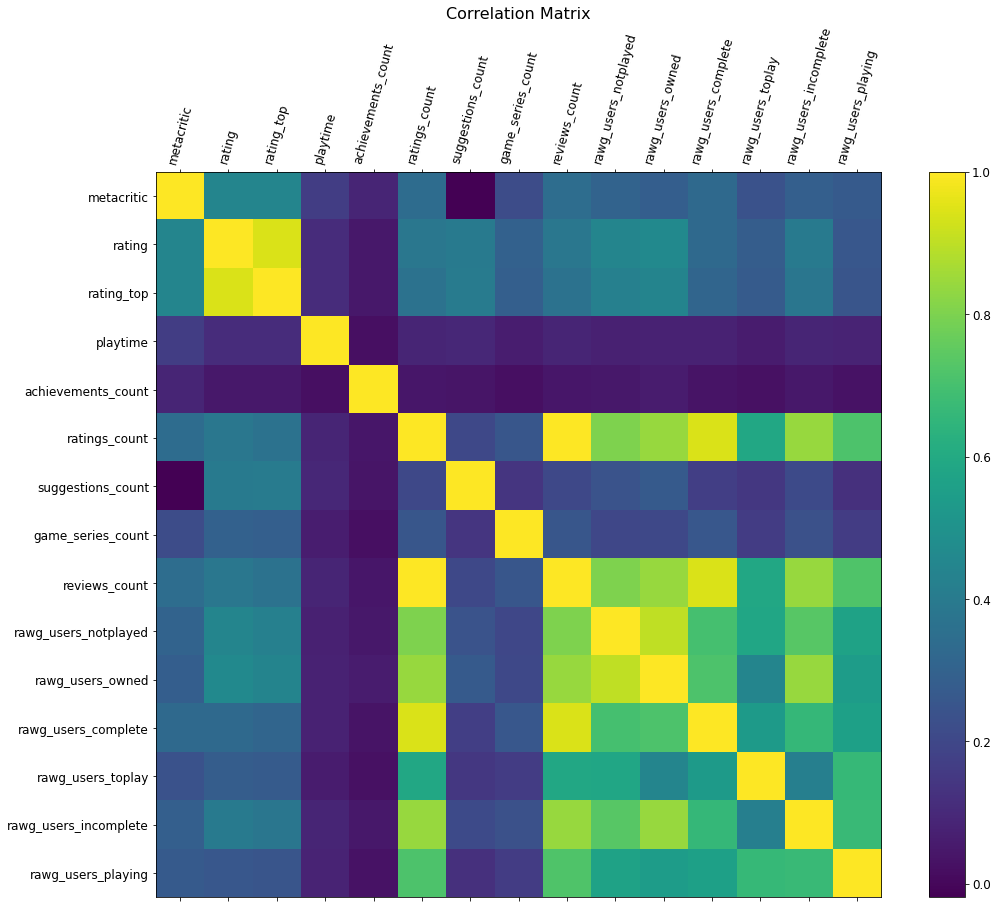

In [10]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(17, 13))
plt.matshow(dataset.corr(), fignum=f.number)
plt.xticks(range(dataset.select_dtypes(['number']).shape[1]), dataset.select_dtypes(['number']).columns, fontsize=12, rotation=75)
plt.yticks(range(dataset.select_dtypes(['number']).shape[1]), dataset.select_dtypes(['number']).columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=16);

TODO: analyser cette matrice, perso j'y trouve rien d'intéressant

Let's see how consistent metacritic ratings and RAWG ratings are: 

In [13]:
dataset.hvplot.scatter(x="rating", y="metacritic")

:Scatter   [rating]   (metacritic)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a9ec7ae-4a3f-4454-8a31-765f030573ac' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>